In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing data
data = pd.read_csv("/content/drive/MyDrive/CSE422 Labs/diabetes_2.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NO
764,2,122,70,27,0,36.8,0.340,27,NO
765,5,121,72,23,112,26.2,0.245,30,NO
766,1,126,60,0,0,30.1,0.349,47,YES


# **Dataset Visualization**
---



In [4]:
#data visualization
#showing first 5 rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [5]:
#finding out rows and columns
data.shape

(768, 9)

In [6]:
#Column names
list(data.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [7]:
#showing randomly 5 rows
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162,76,56,100,53.2,0.759,25,YES
441,2,83,66,23,50,32.2,0.497,22,NO
509,8,120,78,0,0,25.0,0.409,64,NO
551,3,84,68,30,106,31.9,0.591,25,NO
571,2,130,96,0,0,22.6,0.268,21,NO


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


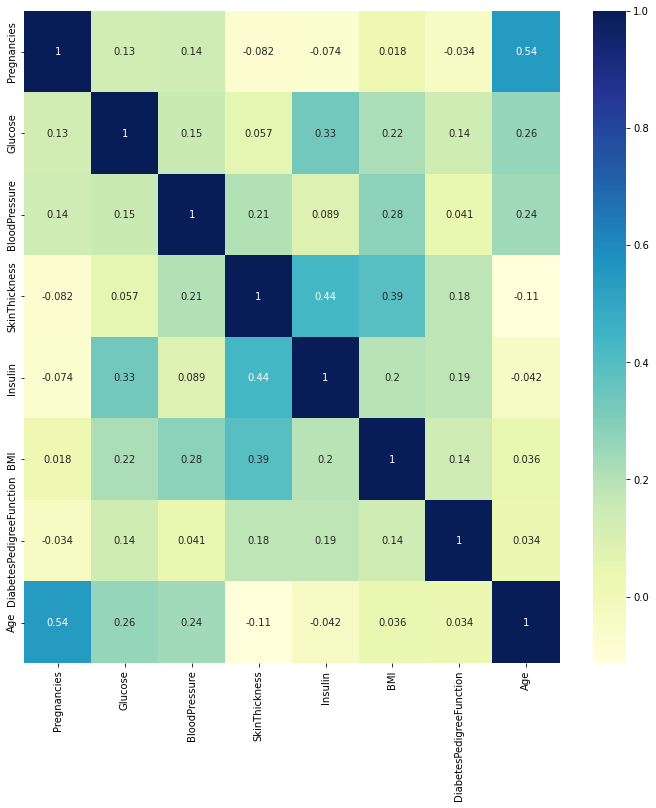

In [10]:
## Correlations of each features in the dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))

#plotting the heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="YlGnBu")

# **Pre-processing**

---



In [11]:
#checking null Values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# changing some columns' names :
data.columns=['num_preg','glucose', 'blood_pres','Skinthickness','insulin','bmi','diab_pred','age','diabetes']
data.head(3)

,num_preg,glucose,blood_pres,Skinthickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES


In [13]:
# Checking if the database is balanced or not by counting the the 0's and 1's the diabetes column
diab_True = len(data.loc[data['diabetes'] == 'YES'])
diab_False = len(data.loc[data['diabetes'] == 'NO'])
print('Yes :', diab_True,'  NO :',diab_False)

Yes : 268   NO : 500


*Taking out categorical value by label Encoding*

In [14]:
#label encoding 
enc = LabelEncoder()
data['diabetes'] = enc.fit_transform(data['diabetes'])
print(data[['diabetes']].head())

   diabetes
0         1
1         0
2         1
3         0
4         1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_preg       768 non-null    int64  
 1   glucose        768 non-null    int64  
 2   blood_pres     768 non-null    int64  
 3   Skinthickness  768 non-null    int64  
 4   insulin        768 non-null    int64  
 5   bmi            768 non-null    float64
 6   diab_pred      768 non-null    float64
 7   age            768 non-null    int64  
 8   diabetes       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
data['diabetes']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [17]:
# checking how many zeros are there in each column
for column in data.columns[:-1]:
    print(column, " -> ",len(data.loc[data[column] == 0]))

num_preg  ->  111
glucose  ->  5
blood_pres  ->  35
Skinthickness  ->  227
insulin  ->  374
bmi  ->  11
diab_pred  ->  0
age  ->  0


*Imputing missing values*

In [29]:
#now we have to fill the values with zero with mean value of the column
imputer = SimpleImputer(missing_values=0, strategy='mean') #creating a object named imputer

imputer.fit(data[['num_preg']])
data['num_preg'] = imputer.transform(data[['num_preg']])

imputer.fit(data[['glucose']])
data['glucose'] = imputer.transform(data[['glucose']])

imputer.fit(data[['blood_pres']])
data['blood_pres'] = imputer.transform(data[['blood_pres']])

imputer.fit(data[['Skinthickness']])
data['Skinthickness'] = imputer.transform(data[['Skinthickness']])

imputer.fit(data[['insulin']])
data['insulin'] = imputer.transform(data[['insulin']])

imputer.fit(data[['bmi']])
data['bmi'] = imputer.transform(data[['bmi']])

In [30]:
# checking how many zeros are there in each column
for column in data.columns[:-1]:
    print(column, " -> ",len(data.loc[data[column] == 0]))

num_preg  ->  0
glucose  ->  0
blood_pres  ->  0
Skinthickness  ->  0
insulin  ->  0
bmi  ->  0
diab_pred  ->  0
age  ->  0


In [31]:
feature = data[['num_preg','glucose','blood_pres','Skinthickness','insulin','bmi','diab_pred','age']]
label = data[['diabetes']]

In [32]:
feature

,num_preg,glucose,blood_pres,Skinthickness,insulin,bmi,diab_pred,age
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [33]:
label

,diabetes
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [34]:
#Stratified 


# stratY = pd.DataFrame(label) #creating a object of DataFrame so that we can stratify it

# #stratifying will give use corresponding Y_Test values in actual portion of the dataset
# # In actual dataset: The ratio of 0's and 1's in Label column, will be also be the same in 
# # test and train sets

# XX=data.loc[:, :'age'].values
# YY=data.loc[:, 'diabetes'].values
# X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size = 0.25, stratify=stratY,random_state=0)

In [35]:
#Randomly
XX=data.loc[:, :'age'].values
YY=data.loc[:, 'diabetes'].values
X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size = 0.25, random_state=0)

In [36]:
#Scaling the values
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [37]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (576, 8)
y_train:  (576,)
X_test:  (192, 8)
y_test:  (192,)


# **Algorithms**

---



In [38]:
# Model: 1
#Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state=1)
dtc.fit(X_train_scaled,y_train)
y_pred_dtc = dtc.predict(X_test_scaled)
score_dtc = dtc.score(X_test_scaled, y_test)
print("Accuracy for Decision Tree Classifier = {0:.2f}".format(score_dtc*100),end="%\n")
print("Error for Decision Tree Classifier = {0:.2f}".format((1-score_dtc)*100),end="%")

Accuracy for Decision Tree Classifier = 60.42%
Error for Decision Tree Classifier = 39.58%

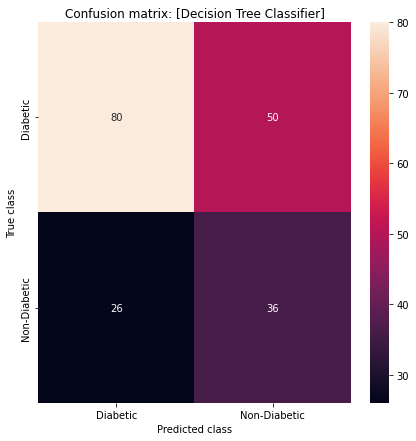

In [39]:
# printing the confusion matrix
LABELS = ['Diabetic', 'Non-Diabetic']

conf_matrix = confusion_matrix(y_test, y_pred_dtc)

plt.figure(figsize =(7, 7))

sns.heatmap(conf_matrix, xticklabels = LABELS,
            
			yticklabels = LABELS, annot = True, fmt ="d");

plt.title("Confusion matrix: [Decision Tree Classifier]")

plt.ylabel('True class')

plt.xlabel('Predicted class')

plt.show()

In [40]:
# Model: 2
#Random Forest
rfm = RandomForestClassifier(random_state=0, max_features=5, n_estimators=500)
rfm.fit(X_train_scaled, y_train)
y_pred_rfm = rfm.predict(X_test_scaled)
score_rfm = rfm.score(X_test_scaled, y_test)
print("Accuracy for Random Forest = {0:.2f}".format(score_rfm*100),end="%\n")
print("Error for Random Forest = {0:.2f}".format((1-score_rfm)*100),end="%")

Accuracy for Random Forest = 74.48%
Error for Random Forest = 25.52%

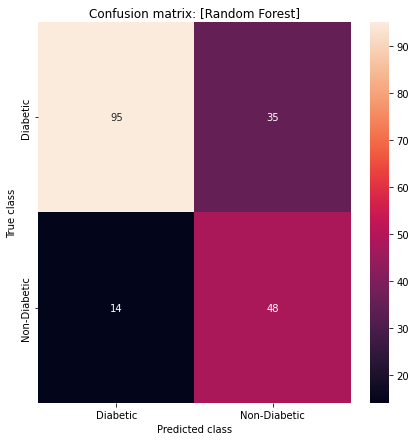

In [41]:
# printing the confusion matrix
LABELS = ['Diabetic', 'Non-Diabetic']

conf_matrix = confusion_matrix(y_test, y_pred_rfm)

plt.figure(figsize =(7, 7))

sns.heatmap(conf_matrix, xticklabels = LABELS,
            
			yticklabels = LABELS, annot = True, fmt ="d");

plt.title("Confusion matrix: [Random Forest]")

plt.ylabel('True class')

plt.xlabel('Predicted class')

plt.show()

In [42]:
# Model: 2
#K Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train) #training
y_pred_knn = knn.predict(X_test_scaled)
score_knn = knn.score(X_test_scaled, y_test)
print("Accuracy for K Neighbors Classifier = {0:.2f}".format(score_knn*100),end="%\n")
print("Error for K Neighbors Classifier = {0:.2f}".format((1-score_knn)*100),end="%")

Accuracy for K Neighbors Classifier = 64.58%
Error for K Neighbors Classifier = 35.42%

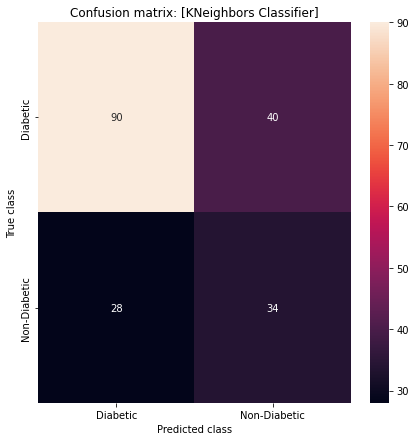

In [43]:
# printing the confusion matrix
LABELS = ['Diabetic', 'Non-Diabetic']

conf_matrix = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize =(7, 7))

sns.heatmap(conf_matrix, xticklabels = LABELS,
            
			yticklabels = LABELS, annot = True, fmt ="d");

plt.title("Confusion matrix: [KNeighbors Classifier]")

plt.ylabel('True class')

plt.xlabel('Predicted class')

plt.show()